In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

Attribute Information about this dataset:

    Id number: 1 to 214 (removed from CSV file)
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    Type of glass: (class attribute)
    -- 1 building_windows_float_processed
    -- 2 building_windows_non_float_processed
    -- 3 vehicle_windows_float_processed
    -- 4 vehicle_windows_non_float_processed (none in this database)
    -- 5 containers
    -- 6 tableware
    -- 7 headlamps


In [2]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
print(df.dtypes)
df.describe()

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: xlabel='Type', ylabel='RI'>

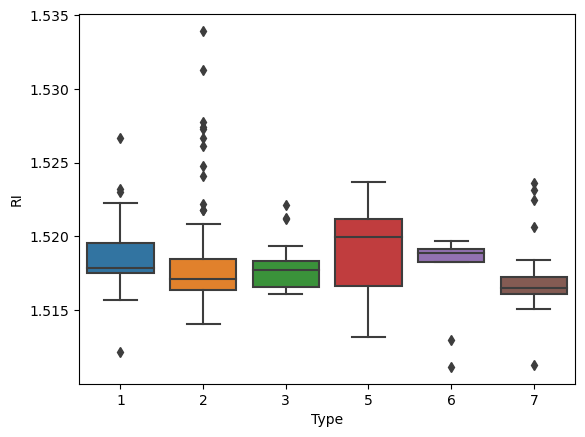

In [5]:
sns.boxplot(x=df['Type'], y=df['RI'], data=df)

<Axes: xlabel='Type', ylabel='Na'>

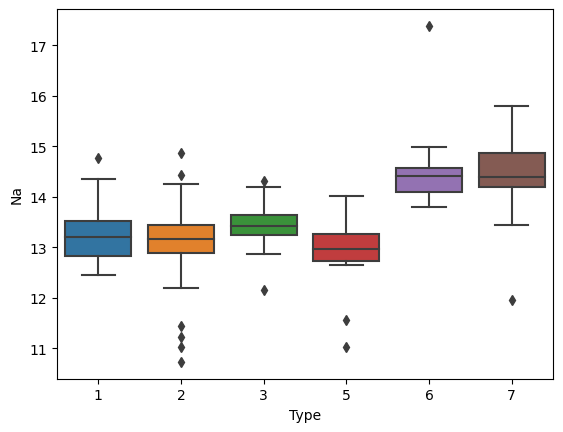

In [6]:
sns.boxplot(x=df['Type'], y=df['Na'], data=df)

<Axes: xlabel='Type', ylabel='Mg'>

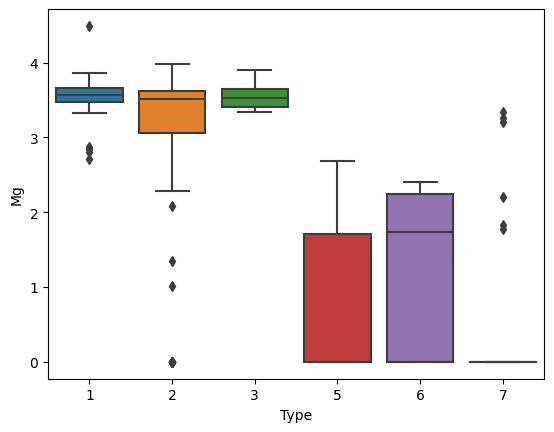

In [7]:
sns.boxplot(x=df['Type'], y=df['Mg'], data=df)

<Axes: xlabel='Type', ylabel='Al'>

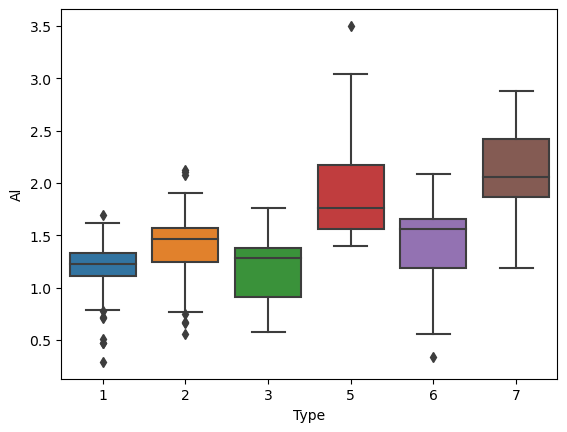

In [8]:
sns.boxplot(x=df['Type'], y=df['Al'], data=df)

<Axes: xlabel='Type', ylabel='Si'>

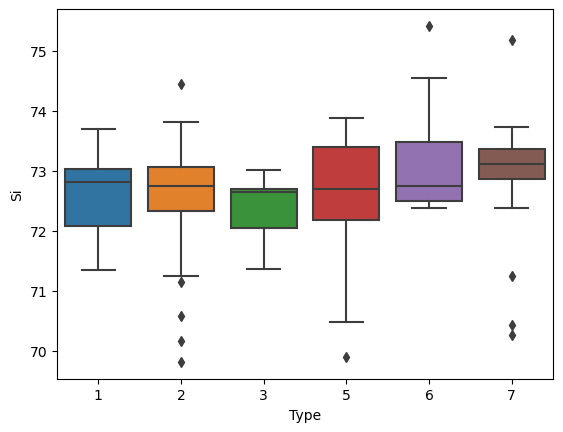

In [9]:
sns.boxplot(x=df['Type'], y=df['Si'], data=df)

<Axes: xlabel='Type', ylabel='K'>

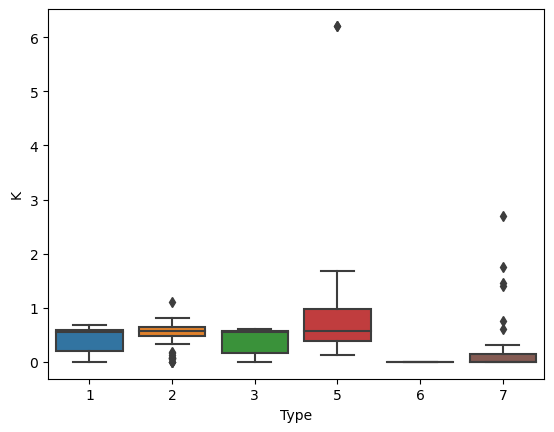

In [10]:
sns.boxplot(x=df['Type'], y=df['K'], data=df)

<Axes: xlabel='Type', ylabel='Ca'>

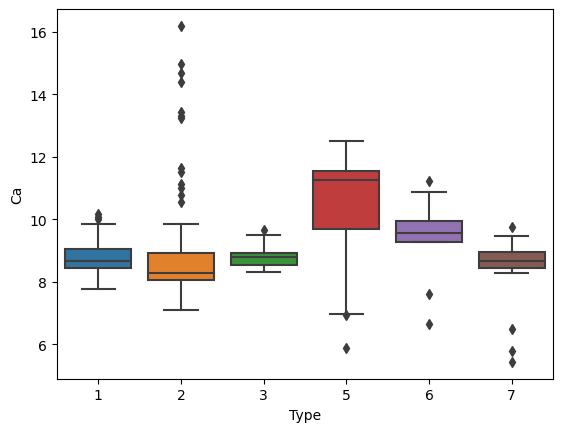

In [11]:
sns.boxplot(x=df['Type'], y=df['Ca'], data=df)

<Axes: xlabel='Type', ylabel='Ba'>

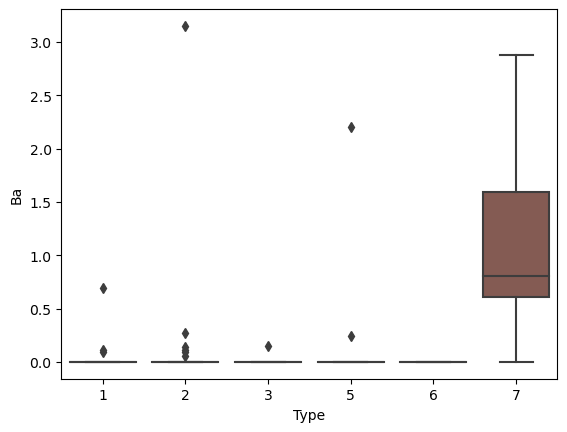

In [12]:
sns.boxplot(x=df['Type'], y=df['Ba'], data=df)

<Axes: xlabel='Type', ylabel='Fe'>

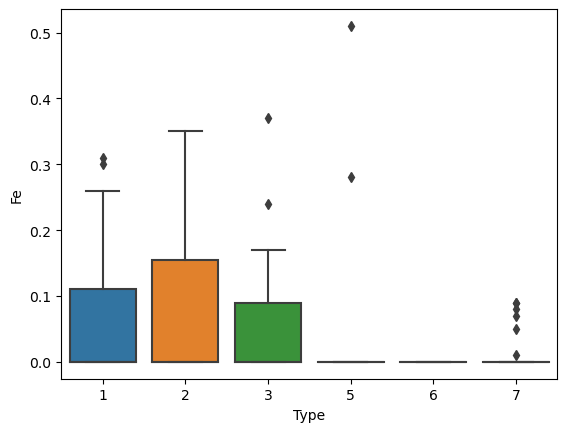

In [13]:
sns.boxplot(x=df['Type'], y=df['Fe'], data=df)

In [14]:
bins=np.linspace(min(df['Type']), max(df['Type']),8)
group_names=['type1','type2','type3','type4','type5','type6','type7']
df['Type_binned']=pd.cut(df['Type'], bins, labels=group_names, include_lowest=True)
df['Type_binned'].value_counts()

type2    76
type1    70
type7    29
type3    17
type5    13
type6     9
type4     0
Name: Type_binned, dtype: int64

Text(0.5, 0, 'Glass type number')

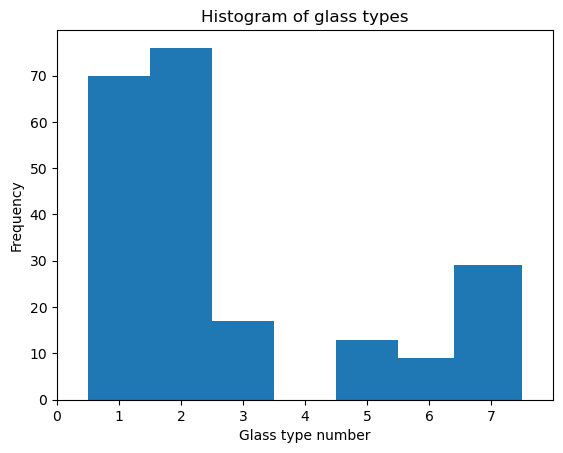

In [15]:
counts = np.bincount(df['Type'])
ax=df['Type'].plot(kind='hist')
ax.bar(range(0,8), counts, width=1, align='center')
ax.set(xticks=range(0,8), xlim=(0,8))
ax.set_title('Histogram of glass types')
ax.set_ylabel('Frequency')
ax.set_xlabel('Glass type number')

In [16]:
#We will check for correlation between different parameters
df.drop(['Type_binned'], axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [17]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

Performing scaling of data and splitting into train and test sets

In [18]:

X=df.drop(['Type', 'Type_binned'], axis=1)
Y=df['Type']
x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=42)
scaler=preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train.astype(float))
x_test=scaler.transform(x_test.astype(float))
print("type counts in train set: \n", y_train.value_counts())
print("type counts in test set: \n", y_test.value_counts())


type counts in train set: 
 2    61
1    56
7    23
3    14
5    10
6     7
Name: Type, dtype: int64
type counts in test set: 
 2    15
1    14
7     6
5     3
3     3
6     2
Name: Type, dtype: int64


In [19]:
#Defining plotting function for confusion matrix
def plot_cmatrix(y_test, y_hat):
    fig, ax = plt.subplots(figsize=(8, 5))
    labels=["Type 1","Type 2","Type 3","Type 5", "Type 6", "Type 7"]
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=labels,)
    cmp.plot(ax=ax)
    return plt.show();

In [20]:
#KNN algorithm
knn=KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
knn
y_hat=knn.predict(x_test)

print("KNN Train set accuracy: ", metrics.accuracy_score(y_train,knn.predict(x_train)))
print("KNN Test set accuracy: ", metrics.accuracy_score(y_test,y_hat))

KNN Train set accuracy:  0.8362573099415205
KNN Test set accuracy:  0.7906976744186046


Now, let's try to find the best value for KNN neighbors.

In [21]:
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1, Ks):
    knn=KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_hat=knn.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
print(mean_acc)

print("The best accuracy ", mean_acc.max(), " with k = ", mean_acc.argmax()+1)


[0.69767442 0.79069767 0.79069767 0.72093023 0.72093023 0.69767442
 0.69767442 0.72093023 0.72093023]
The best accuracy  0.7906976744186046  with k =  2


We see that with KNN algorithm the accuracy is around 79 %.


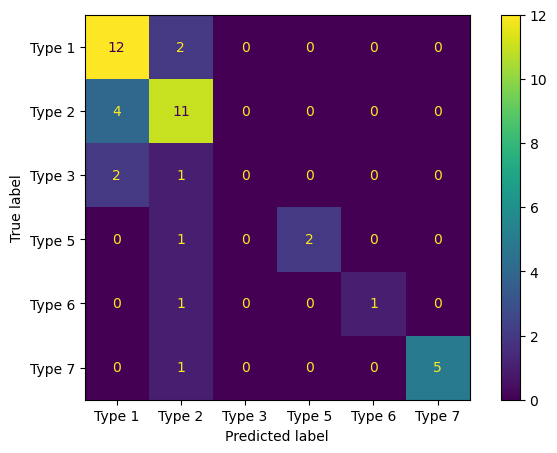

In [22]:
plot_cmatrix(y_test, y_hat)

In [23]:
cnf_matrix=confusion_matrix(y_test, y_hat, labels=[1,2,3,4,5,6,7])
cnf_matrix

array([[12,  2,  0,  0,  0,  0,  0],
       [ 4, 11,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  5]], dtype=int64)

In [24]:

print("For KNN with k=", mean_acc.argmax()+1, ":")
print(classification_report(y_test, y_hat, zero_division=0))
knn_score=knn.score(x_test, y_test)
print("accuracy :",knn_score)

For KNN with k= 2 :
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.72      0.60      0.64        43
weighted avg       0.70      0.72      0.70        43

accuracy : 0.7209302325581395


For SVM :
SVC(C=1000.0, class_weight='balanced', decision_function_shape='ovo',
    gamma='auto')
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.85      0.73      0.79        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.75      0.78      0.76        43
weighted avg       0.80      0.79      0.79        43



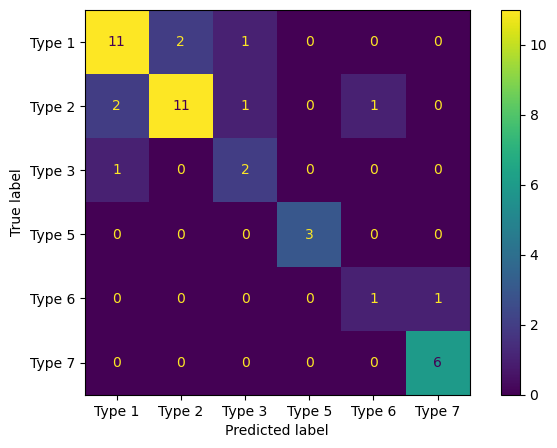

accuracy : 0.7906976744186046


In [25]:
#Let's try SVM

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':['scale', 'auto'],
             'class_weight':['balanced', None],
             'decision_function_shape':['ovo', 'ovr']}
svm = SVC()

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
svm_cv=GridSearchCV(svm, parameters, cv=cv).fit(x_train, y_train)

y_hat=svm_cv.predict(x_test)
print("For SVM :")
print(svm_cv.best_estimator_)
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
svm_cv_score=svm_cv.score(x_test, y_test)
print("accuracy :",svm_cv_score)

Let's try another classification:

Logistic Regression (multi_class='ovr'):
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         6

    accuracy                           0.70        43
   macro avg       0.62      0.60      0.60        43
weighted avg       0.68      0.70      0.69        43



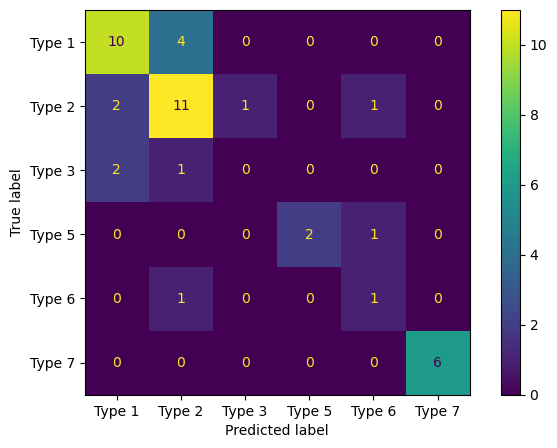

accuracy : 0.6976744186046512


In [26]:
#One vs All - Logistic Regression:

model = LogisticRegression(multi_class='ovr')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("Logistic Regression (multi_class='ovr'):")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
logreg_score=model.score(x_test, y_test)
print("accuracy :",logreg_score)

Now, we will try to use One vs One:

One vs One:
              precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.67      0.67      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.61      0.60      0.60        43
weighted avg       0.66      0.70      0.67        43



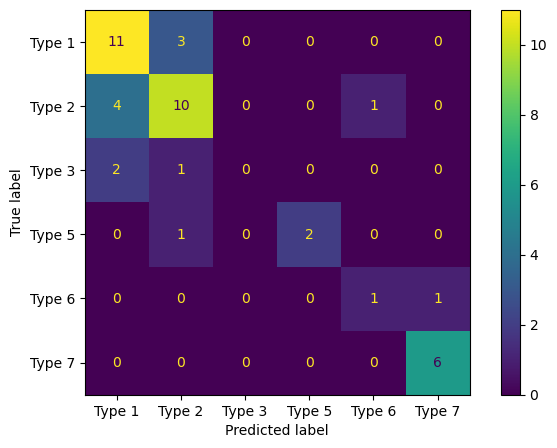

accuracy : 0.6976744186046512


In [27]:

svc_model=SVC()
ovo_model=OneVsOneClassifier(svc_model)
ovo_model.fit(x_train,y_train)
y_hat = ovo_model.predict(x_test)
print("One vs One:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
ovo_score=ovo_model.score(x_test, y_test)
print("accuracy :",ovo_score)

DecisionTreeClassifier:
              precision    recall  f1-score   support

           1       0.90      0.64      0.75        14
           2       0.80      0.53      0.64        15
           3       0.43      1.00      0.60         3
           5       1.00      0.67      0.80         3
           6       0.33      1.00      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.70        43
   macro avg       0.70      0.81      0.69        43
weighted avg       0.79      0.70      0.71        43



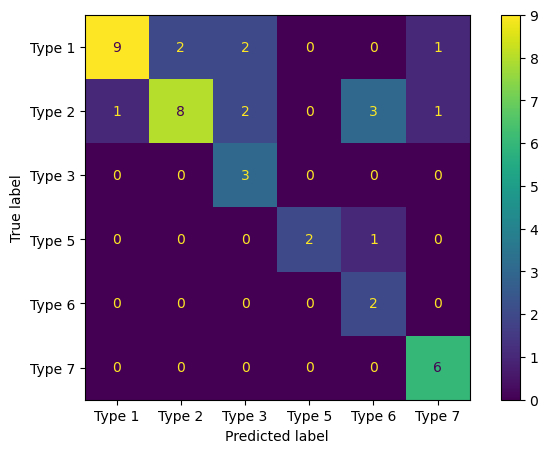

accuracy : 0.6976744186046512


In [28]:

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("DecisionTreeClassifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
tree_score=model.score(x_test, y_test)
print("accuracy :",tree_score)

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



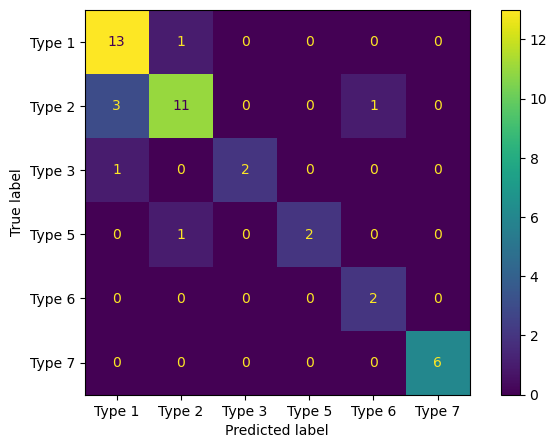

accuracy : 0.8372093023255814


In [29]:
#Random Forest Tree

RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train, y_train)
y_hat = RFC.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
RFC_score=RFC.score(x_test, y_test)
print("accuracy :",RFC_score)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2')
Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        14
           2       0.75      0.80      0.77        15
           3       0.50      0.67      0.57         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.78      0.78      0.77        43
weighted avg       0.79      0.77      0.77        43



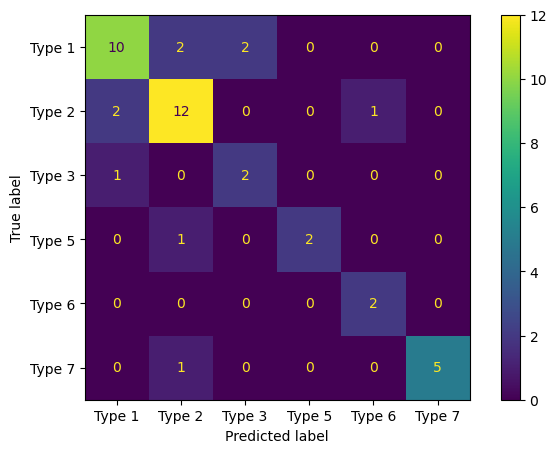

accuracy : 0.7674418604651163


In [30]:
parameters={'criterion':['gini', 'entropy', 'log_loss'],
           'max_features':['sqrt', 'log2', None],
           'class_weight':['balanced', 'balanced_subsample', None]}
RFC = RandomForestClassifier()
RFC_cv=GridSearchCV(RFC, parameters, cv=5).fit(x_train, y_train)
print(RFC_cv.best_estimator_)
y_hat = RFC_cv.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
RFC_cv_score=RFC_cv.score(x_test, y_test)
print("accuracy :",RFC_cv_score)

RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       n_estimators=18)
Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.83      0.67      0.74        15
           3       1.00      0.33      0.50         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.83      0.79      0.77        43
weighted avg       0.82      0.79      0.78        43



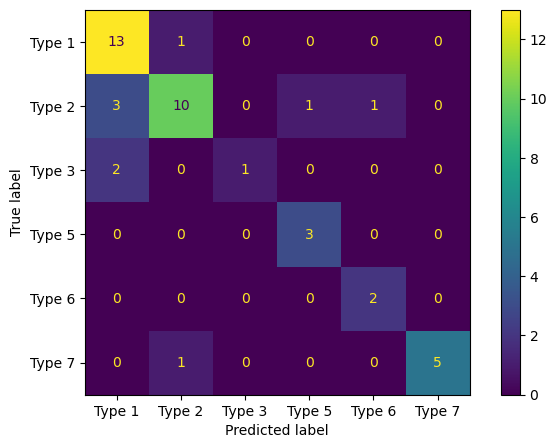

accuracy : 0.7906976744186046


In [31]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

RFC = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
parameters={'criterion':['gini', 'entropy', 'log_loss'],
           'max_features':['sqrt', 'log2', None],
           'class_weight':['balanced', 'balanced_subsample', None],
           'n_estimators':[2*n for n in range(1,10)]}

RFC_cv=GridSearchCV(RFC, parameters, cv=cv).fit(x_train, y_train)
print(RFC_cv.best_estimator_)
y_hat = RFC_cv.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
RFC_RSK_score=RFC_cv.score(x_test, y_test)
print("accuracy :",RFC_RSK_score)

BalancedRandomForestClassifier(class_weight='balanced_subsample',
                               n_estimators=16)
Balanced Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.64      0.50      0.56        14
           2       0.71      0.33      0.45        15
           3       0.25      0.67      0.36         3
           5       0.43      1.00      0.60         3
           6       0.50      1.00      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.56        43
   macro avg       0.56      0.72      0.58        43
weighted avg       0.64      0.56      0.56        43



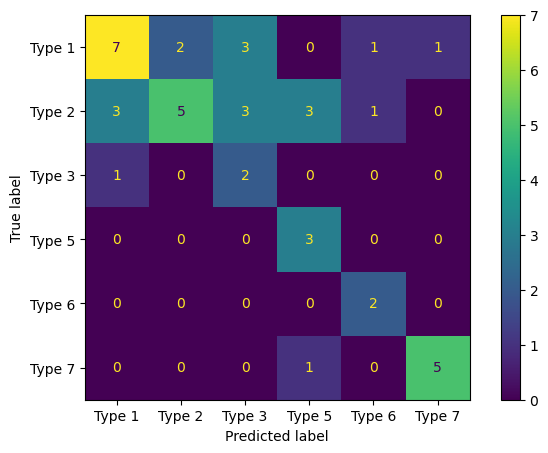

accuracy : 0.5581395348837209


In [32]:
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
parameters={'n_estimators':[2*n for n in range(1,10)],
           'criterion':['gini', 'entropy'],
           'max_features':['auto', 'sqrt', 'log2'],
           'class_weight': ['balanced', 'balanced_subsample', None]}
BRFC = BalancedRandomForestClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
BRFC_cv=GridSearchCV(BRFC, parameters, cv=cv).fit(x_train, y_train)
print(BRFC_cv.best_estimator_)
y_hat = BRFC_cv.predict(x_test)
print("Balanced Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
BRFC_score=BRFC_cv.score(x_test, y_test)
print("accuracy :",BRFC_score)

EasyEnsembleClassifier(n_estimators=12)
Easy Ensemble Classifier:
              precision    recall  f1-score   support

           1       0.50      0.14      0.22        14
           2       0.41      0.47      0.44        15
           3       0.12      0.33      0.18         3
           5       0.67      0.67      0.67         3
           6       0.50      1.00      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.47        43
   macro avg       0.51      0.60      0.52        43
weighted avg       0.50      0.47      0.44        43



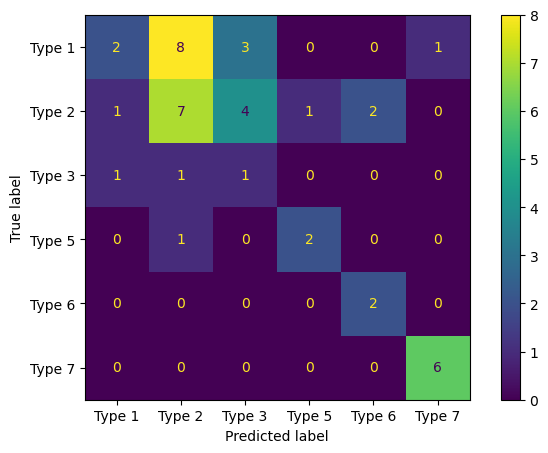

accuracy : 0.46511627906976744


In [33]:
from imblearn.ensemble import EasyEnsembleClassifier
parameters={'n_estimators':[2*n for n in range(1,10)]}

EEC = EasyEnsembleClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
EEC_cv=GridSearchCV(EEC, parameters, cv=cv).fit(x_train, y_train)
print(EEC_cv.best_estimator_)
y_hat = EEC_cv.predict(x_test)
print("Easy Ensemble Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
EEC_score=EEC_cv.score(x_test, y_test)
print("accuracy :",EEC_score)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features='log2')
Decision Tree Classifier:
              precision    recall  f1-score   support

           1       0.45      0.36      0.40        14
           2       0.62      0.53      0.57        15
           3       0.40      0.67      0.50         3
           5       0.50      0.33      0.40         3
           6       0.33      0.50      0.40         2
           7       0.56      0.83      0.67         6

    accuracy                           0.51        43
   macro avg       0.48      0.54      0.49        43
weighted avg       0.52      0.51      0.50        43



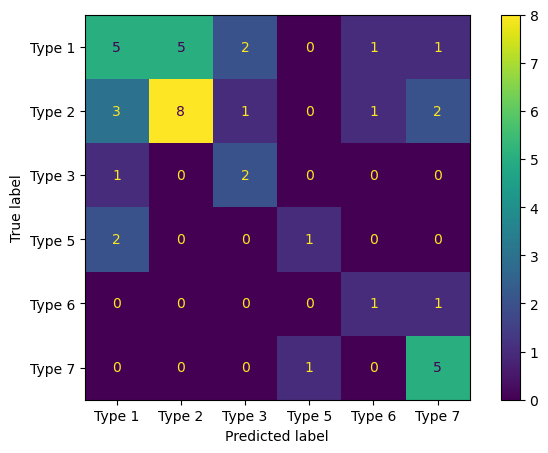

accuracy : 0.5116279069767442


In [34]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10], 'class_weight':['balanced']}

tree = DecisionTreeClassifier()
tree_cv=GridSearchCV(tree, parameters, cv=5).fit(x_train, y_train)
print(tree_cv.best_estimator_)
y_hat = tree_cv.predict(x_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
tree_cv_score=tree_cv.score(x_test, y_test)
print("accuracy :",tree_cv_score)

GradientBoostingClassifier(max_depth=7, n_estimators=70, subsample=0.5)
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.93      0.87      0.90        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.84        43
   macro avg       0.83      0.76      0.76        43
weighted avg       0.85      0.84      0.83        43



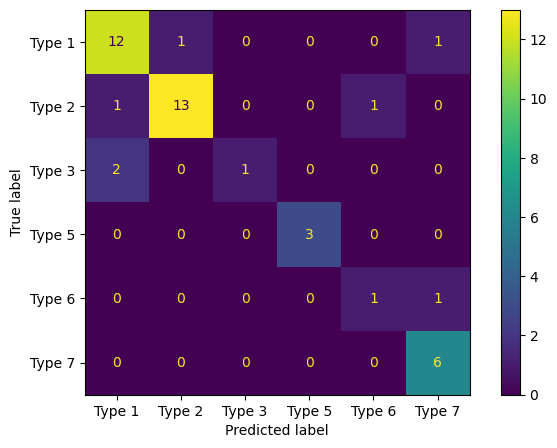

accuracy : 0.8372093023255814


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
parameters = {'n_estimators': [10, 20, 50, 70, 100],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 
              'subsample': [0.3, 0.5, 0.7, 1.0], 
              'max_depth': [3, 5, 7]}
grad_cv = GridSearchCV(estimator=grad, param_grid=parameters, n_jobs=-1, cv=5).fit(x_train, y_train)
print(grad_cv.best_estimator_)
y_hat = grad_cv.predict(x_test)
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
grad_score=grad_cv.score(x_test, y_test)
print("accuracy :",grad_score)

Extra Trees Classifier:
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.86      0.84        43
weighted avg       0.82      0.81      0.81        43



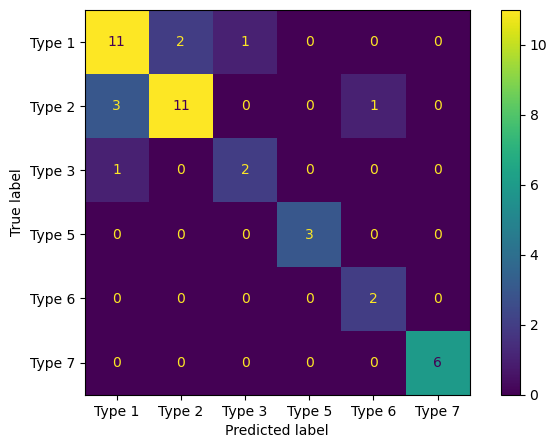

accuracy : 0.813953488372093


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train, y_train)
y_hat = etc.predict(x_test)
print("Extra Trees Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
etc_score=etc.score(x_test, y_test)
print("accuracy :",etc_score)

In [37]:
ser=pd.Series([knn_score, svm_cv_score, logreg_score, ovo_score, tree_score, 
               RFC_score, RFC_cv_score, RFC_RSK_score, BRFC_score, EEC_score, 
               tree_cv_score, grad_score, etc_score], 
              index=["KNN", "SVM", "LogisticReg", "One vs. One", "DecisionTree", "Random Forest", "Random Forest (CV)",
                    "Random Forest (RSK+CV)", "Balanced Random Forest", "Easy Ensemble", "DecisionTree (CV)", 
                     "Gradient Boosting", "Extra Trees"])
koef=pd.DataFrame(data=ser, 
                  index=["KNN", "SVM", "LogisticReg", "One vs. One", "DecisionTree", "Random Forest", "Random Forest (CV)",
                    "Random Forest (RSK+CV)", "Balanced Random Forest", "Easy Ensemble", "DecisionTree (CV)", 
                     "Gradient Boosting", "Extra Trees"],
                  columns=["Accuracy"])
koef.index.name='Method'
koef.reset_index(inplace=True)
koef

,Method,Accuracy
0,KNN,0.720930
1,SVM,0.790698
2,LogisticReg,0.697674
3,One vs. One,0.697674
4,DecisionTree,0.697674
5,Random Forest,0.837209
6,Random Forest (CV),0.767442
7,Random Forest (RSK+CV),0.790698
8,Balanced Random Forest,0.558140
9,Easy Ensemble,0.465116


From the accuracy score I would conclude that the best algorithm for glass classification is Random Forest Classifier ( with parmaters class_weight='balanced_subsample', criterion='log_loss', max_features='log2', n_estimators=16).

Now, let's try to predict RI from the composition. For that we will try to use Al, Si, K and Ca as predictors

In [38]:
#Let's start with linear model
#RI prediction with splitting data into training and testing sets
features3=['Al', 'Si', 'K', 'Ca']
X=df[features3]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat_train=lr.predict(x_train)
yhat_test=lr.predict(x_test)
print("R^2 value for linear regression using all parameters on training data:", lr.score(x_train, y_train))
print("R^2 value for linear regression using all parameters on test data:", lr.score(x_test, y_test))

R^2 value for linear regression using all parameters on training data: 0.8218063754522585
R^2 value for linear regression using all parameters on test data: 0.9057562211480203


<Axes: xlabel='RI', ylabel='Density'>

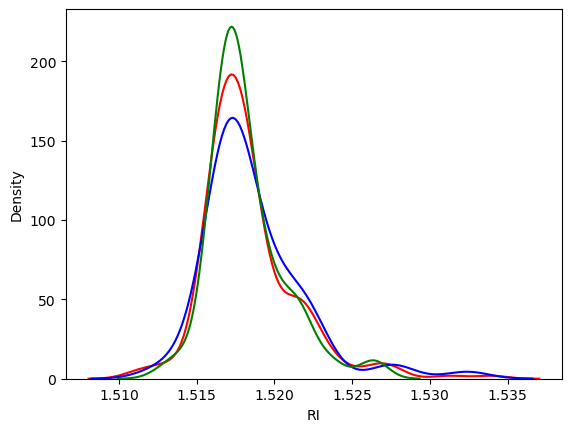

In [39]:
ax1=sns.kdeplot(df['RI'], color='r', label="Actual ")
sns.kdeplot(yhat_test, color='b', label="Fitted ", ax=ax1)
sns.kdeplot(yhat_train, color='g', label="Training", ax=ax1)

In [40]:
features3=['Al', 'Si', 'K', 'Ca']
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[features3], df['RI'])
print("R^2 value for pipeline approach using all parameters: ", pipe.score(df[features3], df['RI']))

NameError: name 'StandardScaler' is not defined

In [ ]:
#Let's split data into training and testing part and we will use RidgeRegression on data
X=df[features3]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
pf=PolynomialFeatures(degree=2)
x_train_pf=pf.fit_transform(x_train)
x_test_pf=pf.fit_transform(x_test)

ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]).fit(x_train_pf, y_train)
print("The train score for ridge model is {}".format(ridge_cv.score(x_train_pf, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(x_test_pf, y_test)))


In [ ]:
from sklearn.linear_model import Ridge
parameters1=[{'alpha':[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
RR=Ridge()
Grid1=GridSearchCV(RR, parameters1, cv=3)
Grid1.fit(df[features3], df['RI'])
print(Grid1.best_estimator_)
BestRR=Grid1.best_estimator_
print("R^2 value for Ridge regression with best alpha value: ", BestRR.score(df[features3], df['RI']))

In [ ]:
features3=['Al', 'Si', 'K', 'Ca']
X=df[features3]
Y=df['RI']
lr=LinearRegression()
lr.fit(X, Y)
yhat=lr.predict(X)
print("R^2 value for linear regression :", lr.score(X, Y))


In [ ]:
#Let's try to visualize residual plot of multiple linear regression
z=df[['Al', 'Si', 'K', 'Ca']]
y=df['RI']
lr.fit(z, y)
yhat=lr.predict(z)
print("R^2 value for multiple linear regression: ", lr.score(z, df['RI']))
sns.residplot(x=yhat, y=df['RI']).set(title='Residual plot: predicted value vs actual RI', xlabel='Predicted RI')

Multiple linear regression would be my choice for prediction of RI, based on the composition of 'Al', 'Si', 'K', 'Ca'.

In [ ]:
#Let's print out the determined coefficients:
print(lr.coef_)# coeffcients for Al, Si, K and Ca
print(lr.intercept_)

In [ ]:
#Now, we can try to use all parameters (except Type) to predict RI using linear regression:
features5=['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe']
X=df[features5]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat_train=lr.predict(x_train)
yhat_test=lr.predict(x_test)
print("R^2 value for linear regression using all parameters on training data:", lr.score(x_train, y_train))
print("R^2 value for linear regression using all parameters on test data:", lr.score(x_test, y_test))


In [ ]:
print(lr.coef_)# coeffcients 
print(lr.intercept_)

In [ ]:
#Let's visualize the distribution of values:
ax1=sns.kdeplot(df['RI'], color='r', label="Actual ")
sns.kdeplot(yhat_test, color='b', label="Fitted ", ax=ax1)
sns.kdeplot(yhat_train, color='g', label="Training", ax=ax1)